In [2]:
%matplotlib inline


# Robust linear model estimation using RANSAC

In this example we see how to robustly fit a linear model to faulty data using
the RANSAC algorithm.


In [78]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn import linear_model, datasets


n_samples = 1000
n_outliers = 100


X, y, coef = datasets.make_regression(n_samples=n_samples, n_features=1,
                                      n_informative=1, noise=10,
                                      coef=True, random_state=0)

print(X.shape, y.shape, coef)

(1000, 1) (1000,) 82.1903908407869


In [79]:
# Add outlier data
np.random.seed(0)
X[:n_outliers] = 3 + 0.5 * np.random.normal(size=(n_outliers, 1))
y[:n_outliers] = -3 + 10 * np.random.normal(size=n_outliers)
print(X[:n_outliers].shape, y[:n_outliers].shape)

(100, 1) (100,)


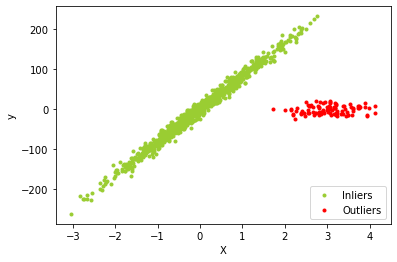

In [80]:
plt.scatter(X[n_outliers:], y[n_outliers:], color='yellowgreen', marker='.',
            label='Inliers')
plt.scatter(X[:n_outliers], y[:n_outliers], color='red', marker='.',
            label='Outliers')
plt.legend(loc='lower right')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [81]:
# Fit line using all data
lr = linear_model.LinearRegression()
lr.fit(X, y)
print(lr.coef_)

[41.29374454]


In [88]:
# Robustly fit linear model with RANSAC algorithm
ransac = linear_model.RANSACRegressor()
ransac.fit(X, y)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
print(f"Number of inliers: {inlier_mask.sum()}")
print(f"Number of outliers: {outlier_mask.sum()}")
print(f"Ransac coef: {ransac.estimator_.coef_}")

Number of inliers: 900
Number of outliers: 100
Ransac coef: [82.12266484]


In [94]:
# Predict data of estimated models
line_X = np.arange(X.min(), X.max())[:, np.newaxis]
# np.newaxis: A convenient alias for None, useful for indexing arrays.
print(X.min(), X.max(), line_X.shape)
line_y = lr.predict(line_X)
line_y_ransac = ransac.predict(line_X)

-3.0461430547999266 4.134877311993804 (8, 1)


In [95]:
# Compare estimated coefficients
print("Estimated coefficients (true, linear regression, RANSAC):")
print(coef, lr.coef_, ransac.estimator_.coef_)

Estimated coefficients (true, linear regression, RANSAC):
82.1903908407869 [41.29374454] [82.12266484]


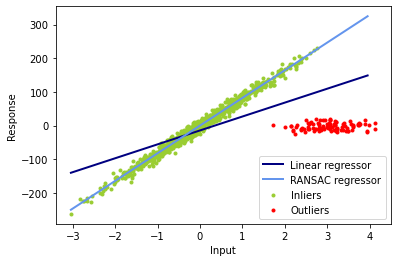

In [96]:
lw = 2  # line width

plt.scatter(X[inlier_mask], y[inlier_mask], color='yellowgreen', marker='.',
            label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], color='red', marker='.',
            label='Outliers')
plt.plot(line_X, line_y, color='navy', linewidth=lw, label='Linear regressor')
plt.plot(line_X, line_y_ransac, color='cornflowerblue', linewidth=lw,
         label='RANSAC regressor')
plt.legend(loc='lower right')
plt.xlabel("Input")
plt.ylabel("Response")
plt.show()